In [ ]:
Column information
1)Pregnancies (임신횟수) =>Number of times pregnant

2)Glucose (포도당) =>Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3)BloodPressure (혈압) =>Diastolic blood pressure (mm Hg)

4)SkinThickness (삼두근 피부 두께) =>Triceps skin fold thickness (mm)

5)Insulin (2시간 혈청 인슐린) =>2-Hour serum insulin (mu U/ml)

6)BMI (체질량지수) =>Body mass index (weight in kg/(height in m)^2)

7)DiabetesPedigreeFunction (당뇨병 혈통 기능) =>Diabetes pedigree function

8)Age =>Age (years)

9)Outcome =>Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
#########################

In [ ]:
diabates 당뇨병 분류를 CNN으로 구현하고

모델을 저장한 후에

사전학습 모델로 불러서 추가적인 층 및 출력층 추가하고

미세조정 fine-tunning 

In [ ]:
#########################

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.impute import KNNImputer
from tensorflow.keras.layers import Conv1D, Flatten, BatchNormalization, MaxPooling1D

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




# # 훈련 데이터 셋에만 잡음이 추가된 데이터 추가
# # 잡음을 추가할 특성 선택
# features = X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
# # 잡음 추가
# noise = np.random.normal(0, 0.1, features.shape)
# augmented_features = features + noise
# # 증강된 데이터 프레임 생성
# augmented_data = X_train.copy()
# augmented_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = augmented_features


# # 원본 데이터와 증강된 데이터 결합
# X_train = np.concatenate([X_train, augmented_data])
# # 레이블도 같은 방식으로 병합
# y_train = np.concatenate([y_train, y_train])  

# #훈련 데이터 셋에만 잡음이 추가된 데이터 추가
# # 잡음을 추가할 특성 선택




# # 훈련 데이터 셋에만 잡음이 추가된 데이터 추가
# feature_indices = {
#     'Glucose': df.columns.get_loc('Glucose'),
#     'BloodPressure': df.columns.get_loc('BloodPressure'),
#     'SkinThickness': df.columns.get_loc('SkinThickness'),
#     'Insulin': df.columns.get_loc('Insulin')
# }

# # 특성별 표준편차 계산 (인덱스 사용)
# std_per_feature = X_train.std(axis=0)
# noise = np.zeros(X_train.shape)

# # 잡음은 각 특성의 표준편차의 1% 선으로 설정
# for feature, index in feature_indices.items():
#     noise[:, index] = np.random.normal(0, std_per_feature[index] * 0.01, X_train.shape[0])

# # 훈련 데이터에 잡음 추가
# X_train_noisy = X_train + noise

# random_indices = np.random.choice(X_train_noisy.shape[0], size=int(X_train_noisy.shape[0] * 0.5), replace=False)
# X_train_noisy_selected = X_train_noisy[random_indices]

# # 데이터셋 병합 및 훈련 데이터 준비
# X_train = np.concatenate([X_train, X_train_noisy])
# y_train = np.concatenate([y_train, y_train])





# 데이터의 형태를 (샘플 수, 특성 수, 1)로 변환하여 CNN에 적용할 수 있도록 변경
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN 모델 구성
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])




# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


model.summary()

C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 7, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,329 (106.75 KB)

 Trainable params: 27,201 (106.25 KB)

 Non-trainable params: 128 (512.00 B)

In [15]:
# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, verbose=1)

# 모델 훈련
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6452 - loss: 0.6429 - val_accuracy: 0.7273 - val_loss: 0.6355 - learning_rate: 0.0010
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5559 - val_accuracy: 0.7338 - val_loss: 0.6338 - learning_rate: 0.0010
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.5519 - val_accuracy: 0.7532 - val_loss: 0.6191 - learning_rate: 0.0010
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5181 - val_accuracy: 0.7468 - val_loss: 0.6212 - learning_rate: 0.0010
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.4676 - val_accuracy: 0.7727 - val_loss: 0.6082 - learning_rate: 0.0010
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5183 - val_accuracy: 0.7597 - val_loss: 0.6098 - learning_rate: 0.0010
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.4963 -

Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 23.


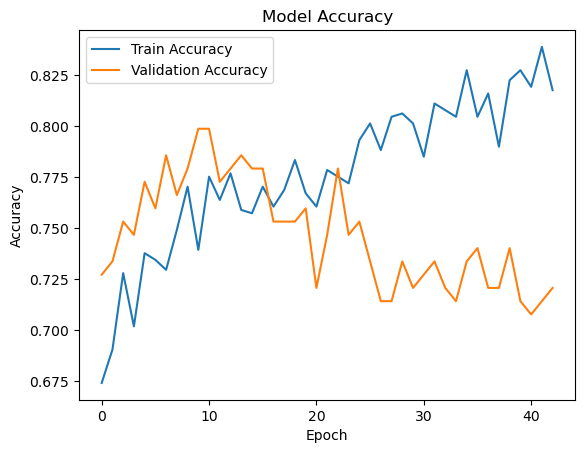

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.5175 
Test Accuracy: 0.7792


In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 모델 성능 평가 (정확도 계산)
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

In [17]:
#########################
# 모델 저장

In [18]:
base_loss,base_accuracy=model.evaluate(X_test_cnn, y_test)

model_file='C:/Users/Hyeon/diabetesModel1.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.5175 


model saved at  C:/Users/Hyeon/diabetesModel1.h5
Accuracy >77.922076
Base Loss >0.51


In [19]:
############
# 모델 로드


In [20]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

base_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



In [21]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)


# 새로운 출력층 추가
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 요약 출력
new_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 7, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,296 (106.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27,296 (106.62 KB)

In [22]:
#history3 = new_model.fit(X_train_cnn, y_train, epochs = 20, batch_size = 32, X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), shuffle = True)

history = new_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

new_model.summary()

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6457 - loss: 0.5673 - val_accuracy: 0.6818 - val_loss: 0.5455 - learning_rate: 0.0010
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.4905 - val_accuracy: 0.7403 - val_loss: 0.5285 - learning_rate: 0.0010
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - loss: 0.4896 - val_accuracy: 0.7727 - val_loss: 0.5217 - learning_rate: 0.0010
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.4489 - val_accuracy: 0.7727 - val_loss: 0.5171 - learning_rate: 0.0010
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.4517 - val_accuracy: 0.7338 - val_loss: 0.5143 - learning_rate: 0.0010
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.4323 - val_accuracy: 0.7273 - val_loss: 0.5125 - learning_rate: 0.0010
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.4483 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 7, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.40 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 27,296 (106.62 KB)

 Optimizer params: 3,204 (12.52 KB)

In [23]:

new_model.evaluate(X_test_cnn, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7207 - loss: 0.5194 


[0.5125125050544739, 0.7272727489471436]

In [24]:
# 미세조정


base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')



In [25]:

history = new_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

new_model.summary()

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7840 - loss: 0.4503 - val_accuracy: 0.7468 - val_loss: 0.5263 - learning_rate: 0.0010
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.4447 - val_accuracy: 0.7403 - val_loss: 0.5296 - learning_rate: 0.0010
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7797 - loss: 0.4101 - val_accuracy: 0.7208 - val_loss: 0.5498 - learning_rate: 0.0010
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4008 - val_accuracy: 0.7143 - val_loss: 0.5431 - learning_rate: 0.0010
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7565 - loss: 0.4492 - val_accuracy: 0.7338 - val_loss: 0.5382 - learning_rate: 0.0010
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 0.3945 - val_accuracy: 0.7078 - val_loss: 0.5529 - learning_rate: 0.0010
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8148 - loss: 0.3784 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 7, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,437 (337.65 KB)

 Trainable params: 28,769 (112.38 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 57,540 (224.77 KB)

In [26]:
new_model.evaluate(X_test_cnn, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7394 - loss: 0.5296 


[0.5262822508811951, 0.7467532753944397]